In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn import tree 
import matplotlib.pyplot as plt
import numpy as np
import warnings 
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score, confusion_matrix

In [2]:
df = pd.read_csv('dados_produtos.csv',sep=',')

In [15]:
warnings.filterwarnings('ignore')

In [3]:
df.head(100)

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
...,...,...,...,...
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1


In [4]:

df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

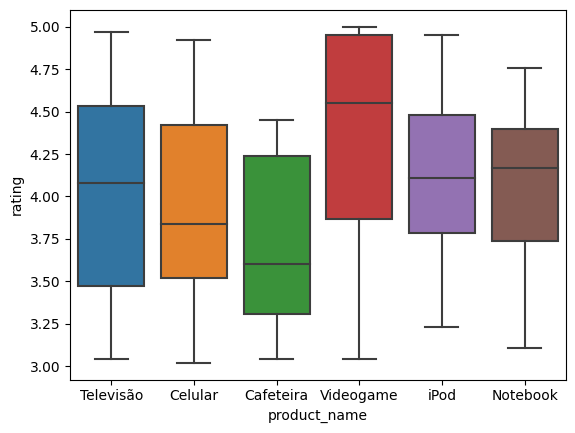

In [5]:
sns.boxplot(x=df['product_name'],y=df['rating'])

In [6]:

df.isnull().sum() #verifica se existe valores vazios

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [7]:
df.isna().sum() #verifica se existe valores Not a number

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [8]:
col_n = df.select_dtypes(include=['number']) # Seleciona apenas os valores numéricos do conjunto de dados

In [9]:
correlacao = col_n.corr() # calcula correlação de variáveis
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

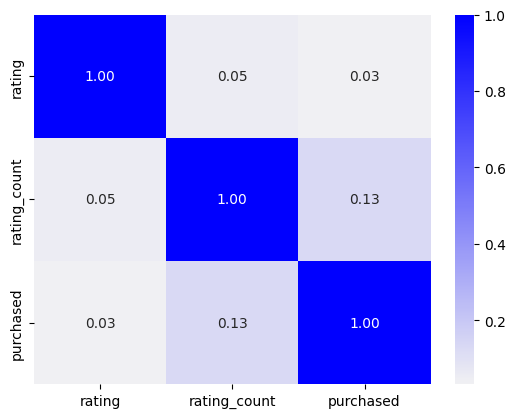

In [10]:
color = sns.color_palette('light:blue',as_cmap= True)
sns.heatmap(correlacao,cmap = color, fmt='.2f',annot= True) # Mapa de calor da correlação


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 2]
 [0 1]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 0]
 [2 2]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 1]
 [0 0]]

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Co

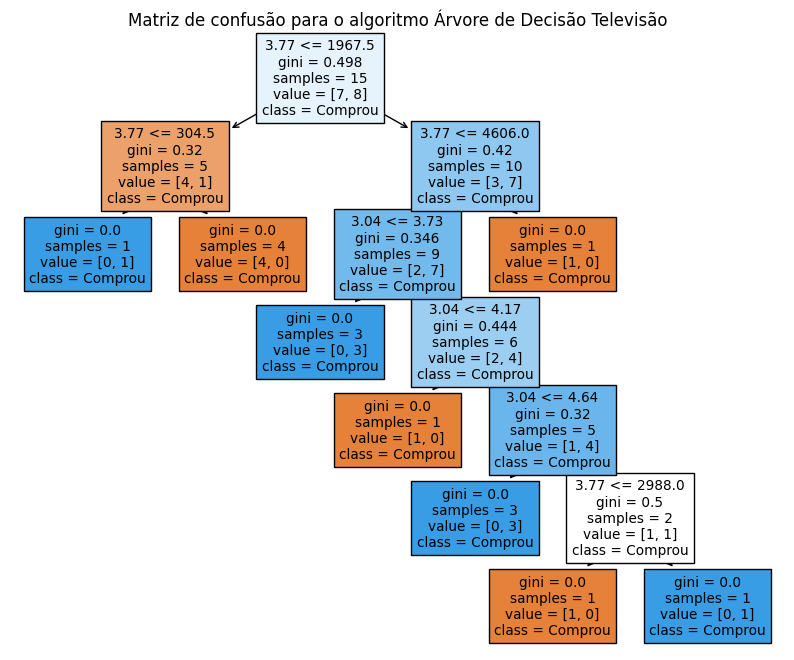

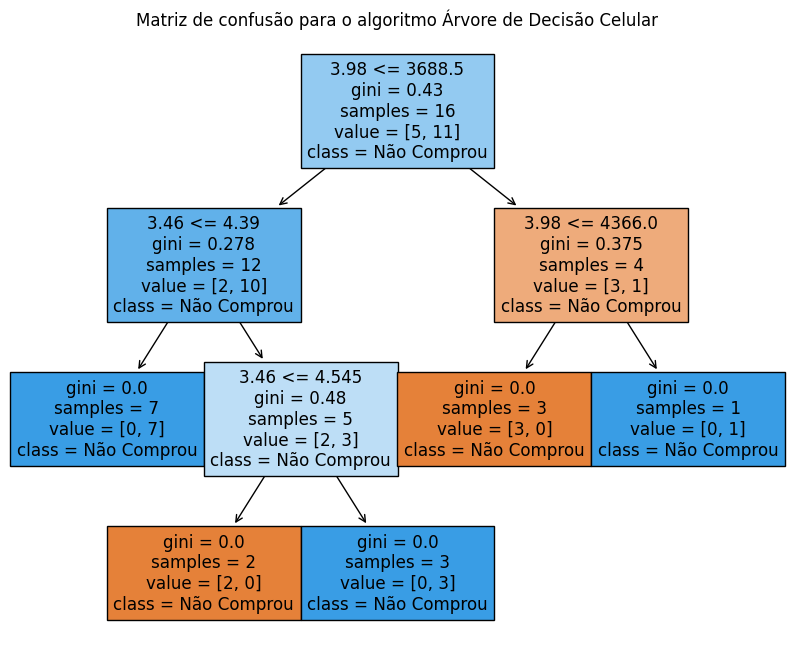

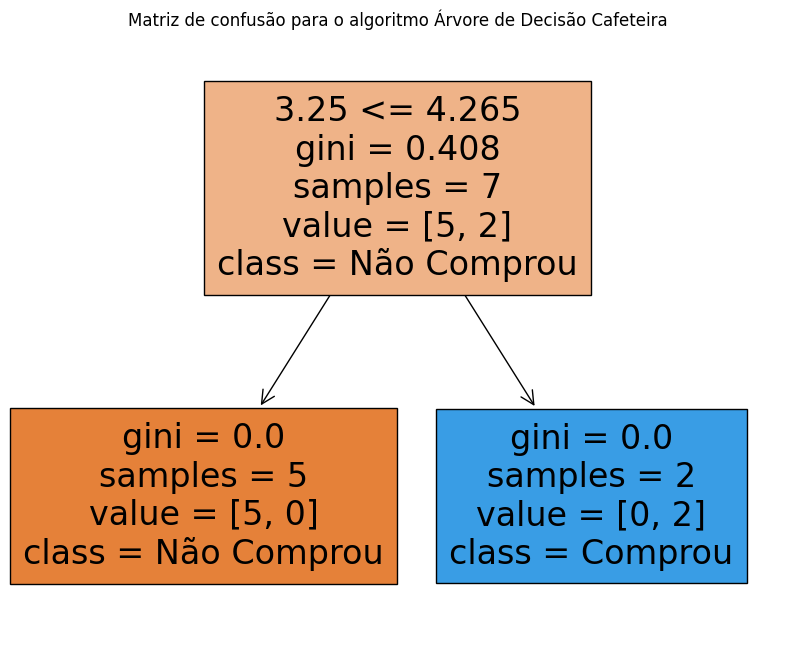

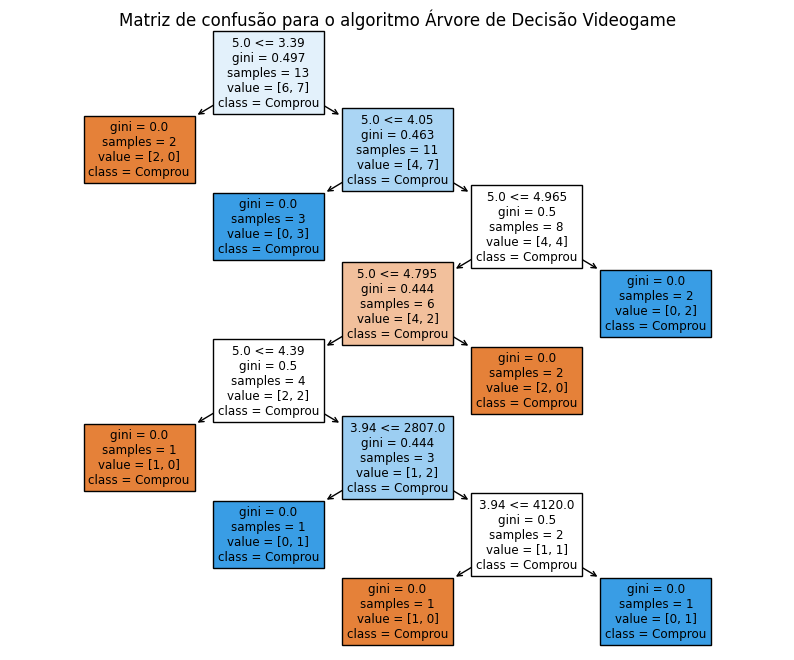

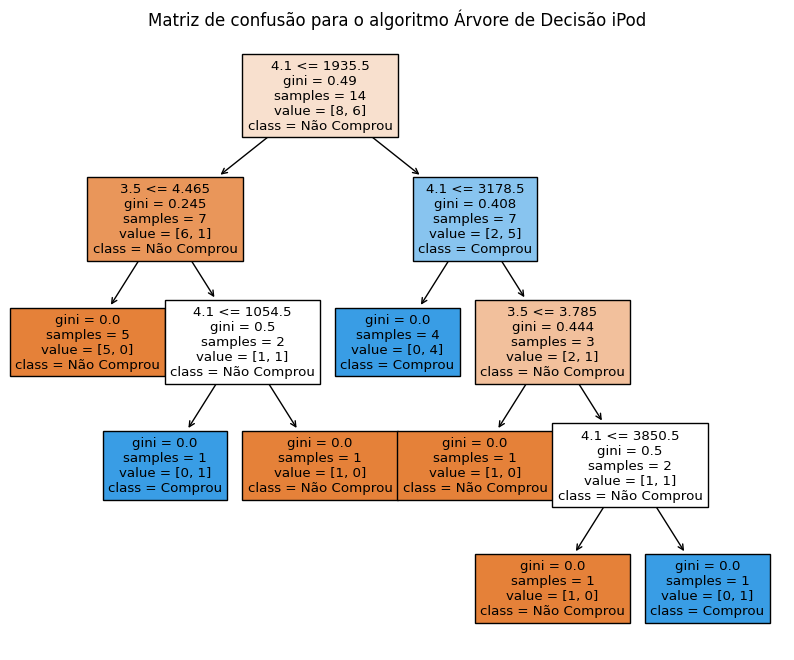

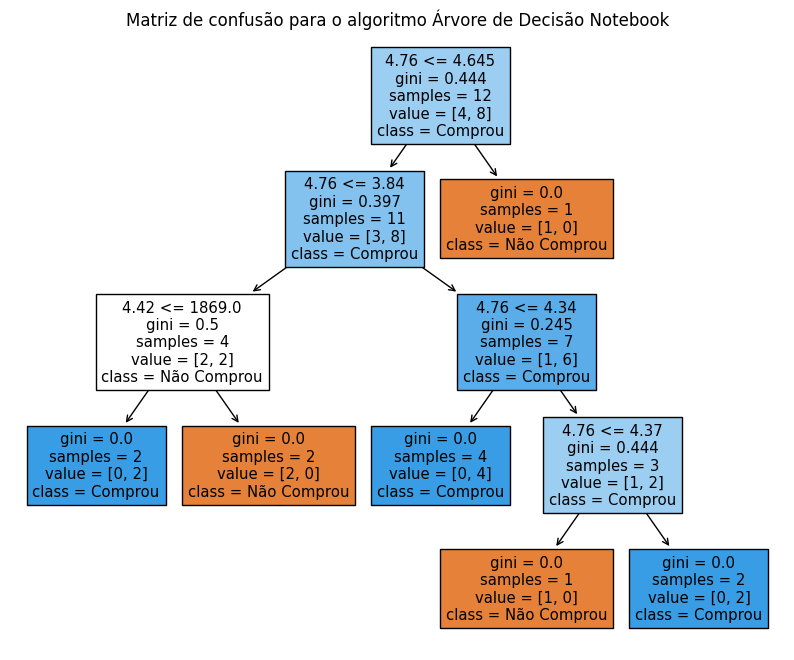

In [24]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_pred, y_test)}')
     
                         
           
    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')
    plt.title(f'Matriz de confusão para o algoritmo Árvore de Decisão {product}') 
    

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Comprou', 'Não comprou'], 
            yticklabels=['Comprou','Não comprou'])   

In [18]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[1, 0],
       [2, 1]], dtype=int64)

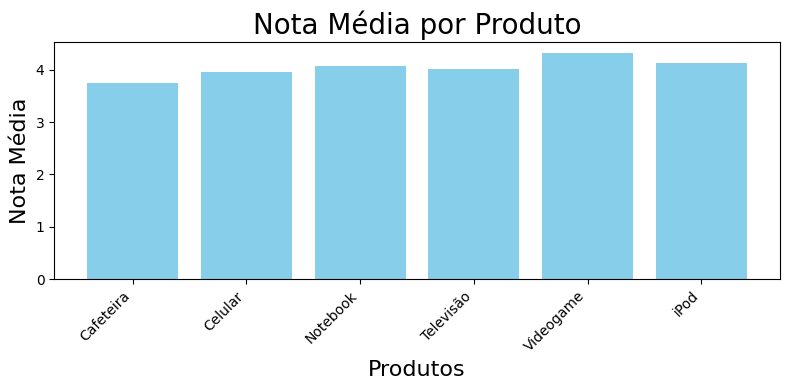

In [19]:
# Calcular a média das notas por produto
notasprodutos = df.groupby('product_name')['rating'].mean().reset_index()

# Renomear colunas 
notasprodutos.columns = ['Produto', 'Nota Média']

# Criar gráfico
plt.figure(figsize=(8, 4))
plt.bar(notasprodutos['Produto'], notasprodutos['Nota Média'], color='skyblue')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Nota Média', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Nota Média por Produto", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

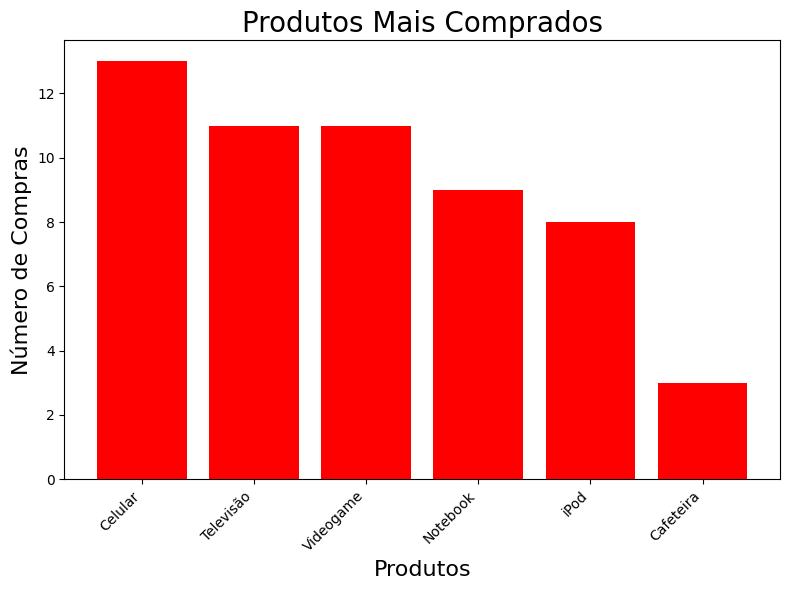

In [20]:
# Calcular a contagem de produtos comprados
produtos_comprados = df[df['purchased'] == 1]
contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()

# Renomear colunas
contagem_produtos.columns = ['Produto', 'Contagem']

# Criar gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='red')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Número de Compras', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Produtos Mais Comprados", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

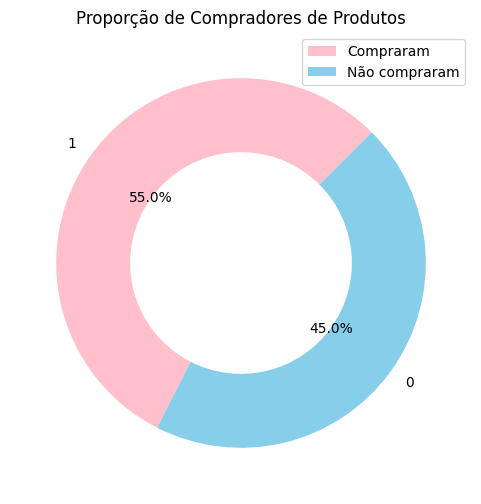

In [21]:
# Calcular a proporção de compradores
proporcao_compradores = df['purchased'].value_counts(normalize=True)

# Cores para o gráfico de pizza
cores_invertidas = ['pink', 'skyblue']

# Visualização
plt.figure(figsize=(6, 6))
plt.pie(proporcao_compradores, labels=proporcao_compradores.index, autopct='%1.1f%%',
        startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Compradores de Produtos')
plt.legend(['Compraram', 'Não compraram'], loc='upper right')
plt.show()